 # Accident Severity Risk Analysis Pipeline

## Objective
The objective of this analysis is to examine whether accident severity is influenced by road structure, specifically the presence of junctions.  
The analysis focuses on understanding risk levels rather than accident frequency, using cleaned accident data.

## Input
- Cleaned accident dataset (us_accidents_cleaned.csv)
- Relevant features:
  - severity
  - junction
- Aggregated measures:
  - Average severity by junction status

## Output
- A comparative analysis of average accident severity at:
  - Junction locations
  - Non-junction locations
- Visual insight supporting or refuting the hypothesis based on observed patterns.

## Hypothesis
Accident severity changes depending on whether an accident occurs at a junction.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [8]:
# Step 3: Load cleaned dataset

df = pd.read_csv("../data/cleaned_data/us_accidents_cleaned.csv")

# Quick check
df.head(), df.shape

(   severity  start_lat   start_lng  \
 0         2  37.530804 -122.297714   
 1         2  27.960699  -82.705109   
 2         2  37.701230 -121.834055   
 3         2  42.385570  -83.261400   
 4         2  38.347090 -112.659636   
 
                                          description        city     county  \
 0                 Accident on 39th Ave at Edison St.   San Mateo  San Mateo   
 1  Accident on Bayshore Blvd at FL-60 Gulf To Bay...  Clearwater   Pinellas   
 2  Stationary traffic on I-580 W from Airway Blvd...   Livermore    Alameda   
 3        At I-96 Local/Outer Dr/Exit 180 - Accident.     Detroit      Wayne   
 4            At I-15-BL/1400 St/Exit 112 - Accident.      Beaver     Beaver   
 
   state  temperature(f)  humidity(%)  visibility(mi)  ... precipitation(in)  \
 0    CA            69.8         56.0             9.0  ...               0.0   
 1    FL            84.0         82.0             9.0  ...               0.0   
 2    CA            68.0         39.0     

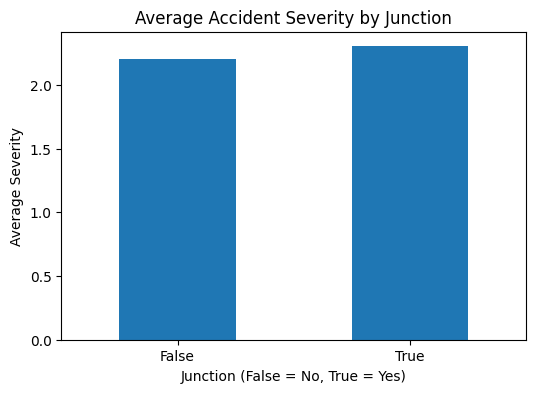

In [10]:
# Visualization Pipeline: Severity vs Junction

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/cleaned_data/us_accidents_cleaned.csv")

# Select relevant columns
df_vis = df[['junction', 'severity']].dropna()

# Ensure correct data types
df_vis['junction'] = df_vis['junction'].astype(bool)
df_vis['severity'] = pd.to_numeric(df_vis['severity'], errors='coerce')
df_vis = df_vis.dropna()

# Aggregate: average severity by junction
avg_severity = df_vis.groupby('junction')['severity'].mean()

# Visualization
plt.figure(figsize=(6,4))
avg_severity.plot(kind='bar')
plt.title("Average Accident Severity by Junction")
plt.xlabel("Junction (False = No, True = Yes)")
plt.ylabel("Average Severity")
plt.xticks(rotation=0)
plt.show()

## Insight
The visualization indicates that accidents occurring at junctions tend to have a different average severity compared to those occurring outside junctions.  
This suggests that junctions may represent higher-risk locations where accident outcomes are more severe.